In [68]:
import pandas as pd

life_expectancy_df = pd.read_csv('lab5-data.csv')

life_expectancy_df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Australia,Oceania,2000,5.1,6.2,77.0385,10.17,95,85,26.2,...,90,0.04,45559,19.15,0.7,0.7,11.9,1,0,79.2
1,Australia,Oceania,2001,5.0,6.1,73.7145,9.53,94,85,26.3,...,92,0.04,45865,19.41,0.7,0.7,11.9,1,0,79.6
2,Australia,Oceania,2002,5.0,6.0,71.9350,9.84,95,85,26.4,...,92,0.04,47127,19.65,0.7,0.7,11.8,1,0,79.9
3,Australia,Oceania,2003,4.9,5.9,69.8790,9.97,95,86,26.5,...,93,0.05,47997,19.90,0.7,0.7,11.8,1,0,80.2
4,Australia,Oceania,2004,4.8,5.8,67.9200,9.84,95,85,26.6,...,92,0.05,49439,20.13,0.7,0.6,11.8,1,0,80.5


Проаналізуємо дані на наявність порожніх комірок

In [13]:
life_expectancy_df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

Стандартизуємо дані

In [69]:
from sklearn.preprocessing import StandardScaler

features = ['Life_expectancy', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality',
            'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio',
            'Diphtheria', 'GDP_per_capita',
            'Thinness_ten_nineteen_years', 'Thinness_five_nine_years',
            'Schooling']

scaler = StandardScaler()

life_expectancy_df[features] = scaler.fit_transform(life_expectancy_df[features])

Побудуємо кореляційну матрицю

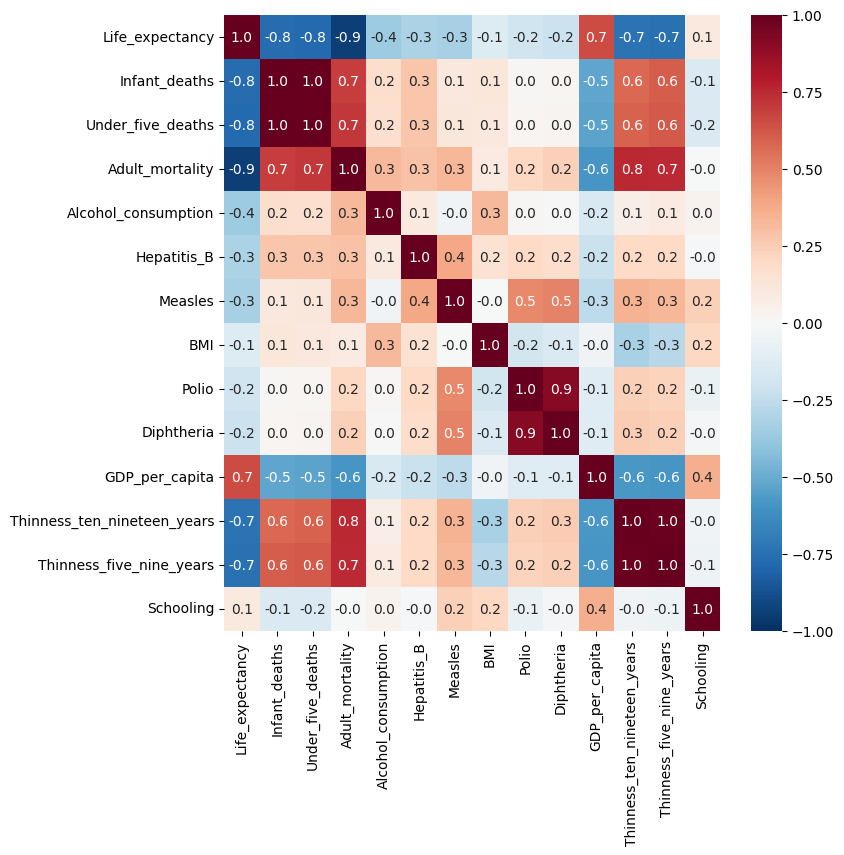

In [70]:
from seaborn import heatmap, jointplot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
ax = heatmap(life_expectancy_df[features].corr(numeric_only=True), fmt=".1f", annot=True, ax=ax, cmap="RdBu_r", vmin=-1, vmax=1)
plt.show()

Можна помітити, що між деякими ознаками існує доволі висока кореляція (більше 0.9), що може негативно вплинути на достовірність подальшого аналізу. Для того щоб позбутися мультиколінеарності, відкинемо деякі ознаки.

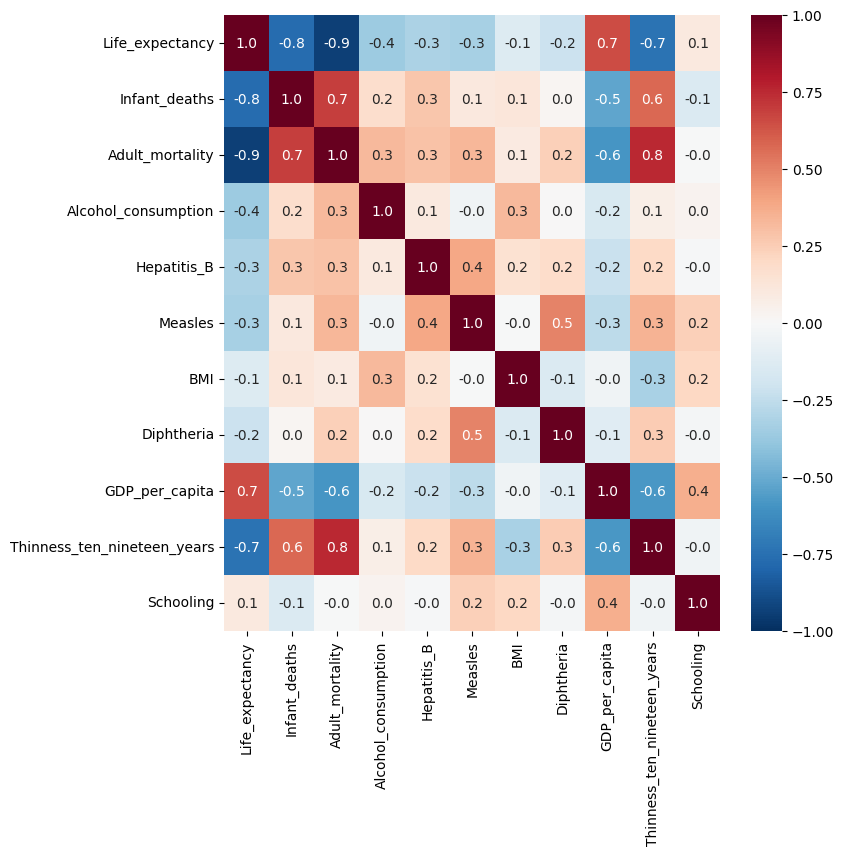

In [71]:
cols_to_drop = ['Under_five_deaths', 'Thinness_five_nine_years', 'Polio']

life_expectancy_df.drop(columns=cols_to_drop, inplace=True)


features = [x for x in features if x not in cols_to_drop]

fig, ax = plt.subplots(figsize=(8, 8))
ax = heatmap(life_expectancy_df[features].corr(numeric_only=True), fmt=".1f", annot=True, ax=ax, cmap="RdBu_r", vmin=-1, vmax=1)
plt.show()

Обчислення коефіцієнтів кореляції

In [ ]:
!pip install pingouin

In [72]:
import pingouin as pg

x = life_expectancy_df[['Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B',
                        'Measles', 'BMI', 'Diphtheria', 'Infant_deaths',
                        'GDP_per_capita', 'Thinness_ten_nineteen_years', 'Schooling']]
y = life_expectancy_df['Life_expectancy']

# Обчислюємо часткову кореляцію для кожної змінної
partial_corr = {}
for col in x.columns:
    covar_cols = [c for c in x.columns if c != col]
    partial_corr[col] = pg.partial_corr(data=life_expectancy_df, x=col, y='Life_expectancy', covar=covar_cols)

for var_name, corr in partial_corr.items():
    print(f"Часткова кореляція між {var_name} та Life_expectancy: {corr['r'][0]:.3f}, p-value: {corr['p-val'][0]:.9f}")


Часткова кореляція між Adult_mortality та Life_expectancy: -0.771, p-value: 0.000000000
Часткова кореляція між Alcohol_consumption та Life_expectancy: -0.280, p-value: 0.000000140
Часткова кореляція між Hepatitis_B та Life_expectancy: 0.011, p-value: 0.835292579
Часткова кореляція між Measles та Life_expectancy: -0.178, p-value: 0.000913893
Часткова кореляція між BMI та Life_expectancy: -0.220, p-value: 0.000039685
Часткова кореляція між Diphtheria та Life_expectancy: -0.023, p-value: 0.664867986
Часткова кореляція між Infant_deaths та Life_expectancy: -0.457, p-value: 0.000000000
Часткова кореляція між GDP_per_capita та Life_expectancy: 0.100, p-value: 0.064728592
Часткова кореляція між Thinness_ten_nineteen_years та Life_expectancy: -0.209, p-value: 0.000098251
Часткова кореляція між Schooling та Life_expectancy: 0.242, p-value: 0.000005749


* Можна зробити висновок, що найбільший вплив на тривалість життя має такий фактор як смертність серед дорослих людей.
* Значно меший вплив має смертність серед немовлят, хоча цей фактор також негативно впливає на тривалість життя.
* Ще менший вплив мають вживання алкоголю та індекс маси тіла.
* Натомість найбільшим позитивним фактором є освіта та ВВП на душу населення, хоча ці фактори мають досить слабкий вплив на досліджувану ознаку.



Побудова моделі множинної лінійної регресії

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

factors = ['Adult_mortality', 'Alcohol_consumption', 'Infant_deaths', 'GDP_per_capita', 'Schooling']
selected_data = life_expectancy_df[factors]
life_expectancy_column = life_expectancy_df['Life_expectancy']
X_train, X_test, y_train, y_test = train_test_split(selected_data, life_expectancy_column, test_size=0.1, random_state=20)


regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared',  regr.score(X_train, y_train))
print('Test data r-squared',  regr.score(X_test, y_test))

pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])


Training data r-squared 0.9305743168396932
Test data r-squared 0.8928719563822881


,coef
Adult_mortality,-0.714552
Alcohol_consumption,-0.086354
Infant_deaths,-0.200771
GDP_per_capita,0.104689
Schooling,0.032662


Отримані результати свідчать про доволі високу точність моделі.

In [84]:
import numpy as np

X_train_with_const = np.column_stack([np.ones(len(X_train)), X_train])

het_test = smd.het_white(residuals, X_train_with_const)

print("Мю-критерій:", het_test[0])
print("p-value:", het_test[1])
print("Lagrange multiplier:", het_test[2])
print("F-statistic:", het_test[3])


Мю-критерій: 90.44684923319684
p-value: 6.191742189173766e-11
Lagrange multiplier: 5.914752339544816
F-statistic: 4.671539161077087e-13


* H_0: наявна гомоскедастичність
* H_A: наявна гетероскедастичність (залишки розкидані нервіномірно)
* p>0.05, тому ми не можемо відкинути нульову гіпотезу.
* Це означає, що немає достатніх доказів тому, що в регресійній моделі присутня гетероскедастиність

Отже, можна зробити такі висновки:

**1. Основні фактори, що впливають на тривалість життя**

Найважливішими факторами, які впливають на очікувану тривалість життя, є рівень смертності серед дорослих та смертність немовлят, ВВП країни, худорлявість неповнолітніх, а також освіта.

**2. Вплив показників харчування на тривалість життя**

Індекс маси тіла, який не відповідає нормі, має негативну кореляцію із тривалістю життя.
«Худорлявість 1-19 років» має  схожий рівень кореляції як і в індекс маси тіла.

**3. Вплив вживання алкоголю на тривалість життя**

Відносний вплив не такий високий, має помірний негативний вплив. Збільшення даного фактору призводить до зменшення досліджуваної ознаки.

Серед факторів, які позитивно впливають на тривалість життя можна виділити високий ВВП країни та рівень освіти.

